<a href="https://colab.research.google.com/github/sharpayyu/hand-gesture-recognition/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Gesture Recognition


This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.


## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/131A1ZUSIpR0iR94pBAMUfpKZ3cWjowOi?usp=sharing

# Part A. Data Collection

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN
For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### Part 1. Data Loading and Splitting

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html)

**Answer**:
We have 102 students (each provided with 3 pictures) for letter A to H, and 101 students for letter I. I decided to split the data into training, validation and testing in a ratio around 70:15:15. Assume student 1 provided 3 pictures for letter A, all 3 pictures should all be used for either training, or validation, or testing. This is to prevent the model from learning the 'hand' of the student. Therefore, I split the data in the following way (and put them in separate folders):
1.   training: all pictures from student before 70
2.   validation: all pictures from student 70 to 90
3.   testing: all the rest

Then I followed the data loading method from Prelab 2B and organized the folders in such way that all training pictures are in one umbrella folder, which contains 9 separate subfolders each contains one letter from A to I. Then I did the same for validation and test.

In the end, I have 1613 numbers of pictures for training, 449 for validation and 369 for test.
In a nutshell, it follows this pattern:

/datadir

    /train  
        /A
           /1_A_1
           /1_A_2
           /1_A_3
           .
           .
           /68_A_1
           /68_A_2
           /68_A_3
        /B  
           /1_B_1
           /1_B_2
           /1_B_3
           .
           .
           /68_B_1
           /68_B_2
           /68_B_3
        .  
        .  
    /val  
        /A  
           /70_A_1
           /70_A_2
           /70_A_3
        /B  
        .  
        .  
    /test  
        /A  
           /90_A_1
           /90_A_2
           /90_A_3
        /B  
        .  
        .  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

In [ ]:
# define training, val, and test data directories
data_dir = '/content/drive/MyDrive/Colab Notebooks/MIE1517_Deep_learning/Lab_assignment/Lab_3b_organized'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')
#classes are folders in each directory with these names
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [ ]:
# load and transform data using ImageFolder

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((224,224))]) #remove random crop

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))
print('Num test images: ', len(test_data))

Num training images:  1613
Num validation images:  449
Num test images:  369


In [ ]:
train_data

Dataset ImageFolder
    Number of datapoints: 1613
    Root location: /content/drive/MyDrive/Colab Notebooks/MIE1517_Deep_learning/Lab_assignment/Lab_3b_organized/train/
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
# define dataloader parameters
batch_size  = 128 ##remember to check this
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

In [ ]:
# to view what is in each batch of each dataset. Pytorch gets 'labels' from the folers name, so "A" to "I" and label them as 0 to 8.
# below each tensor has 20 samples, and it has 80ish? batches.
for data, labels in train_loader:
  print(data.shape, labels)

In [ ]:
for data, labels in test_loader:
  print(data.shape, labels)

torch.Size([20, 3, 224, 224]) tensor([3, 0, 7, 4, 2, 3, 1, 7, 8, 6, 8, 0, 0, 6, 3, 1, 7, 5, 5, 6])
torch.Size([20, 3, 224, 224]) tensor([6, 0, 1, 5, 0, 4, 6, 1, 4, 3, 2, 5, 6, 1, 8, 0, 5, 8, 7, 4])
torch.Size([20, 3, 224, 224]) tensor([5, 3, 2, 1, 5, 0, 6, 6, 3, 4, 3, 3, 4, 8, 5, 1, 2, 1, 5, 8])
torch.Size([20, 3, 224, 224]) tensor([1, 4, 7, 6, 0, 4, 3, 5, 6, 0, 7, 2, 6, 8, 8, 7, 2, 5, 8, 1])
torch.Size([20, 3, 224, 224]) tensor([1, 6, 8, 8, 6, 7, 5, 3, 8, 7, 5, 6, 8, 2, 6, 1, 6, 5, 8, 5])
torch.Size([20, 3, 224, 224]) tensor([1, 4, 2, 0, 5, 6, 0, 7, 1, 2, 1, 0, 0, 2, 3, 6, 5, 1, 1, 4])
torch.Size([20, 3, 224, 224]) tensor([1, 4, 1, 1, 4, 7, 1, 2, 7, 0, 3, 6, 2, 3, 5, 1, 5, 2, 4, 0])
torch.Size([20, 3, 224, 224]) tensor([0, 3, 1, 5, 8, 0, 2, 6, 3, 1, 4, 1, 6, 1, 0, 2, 5, 0, 1, 0])
torch.Size([20, 3, 224, 224]) tensor([6, 0, 1, 1, 6, 0, 1, 8, 6, 4, 2, 1, 1, 6, 5, 8, 5, 4, 1, 4])
torch.Size([20, 3, 224, 224]) tensor([7, 2, 2, 0, 2, 8, 8, 4, 0, 6, 4, 1, 5, 4, 0, 1, 7, 7, 0, 1])
torch.Size

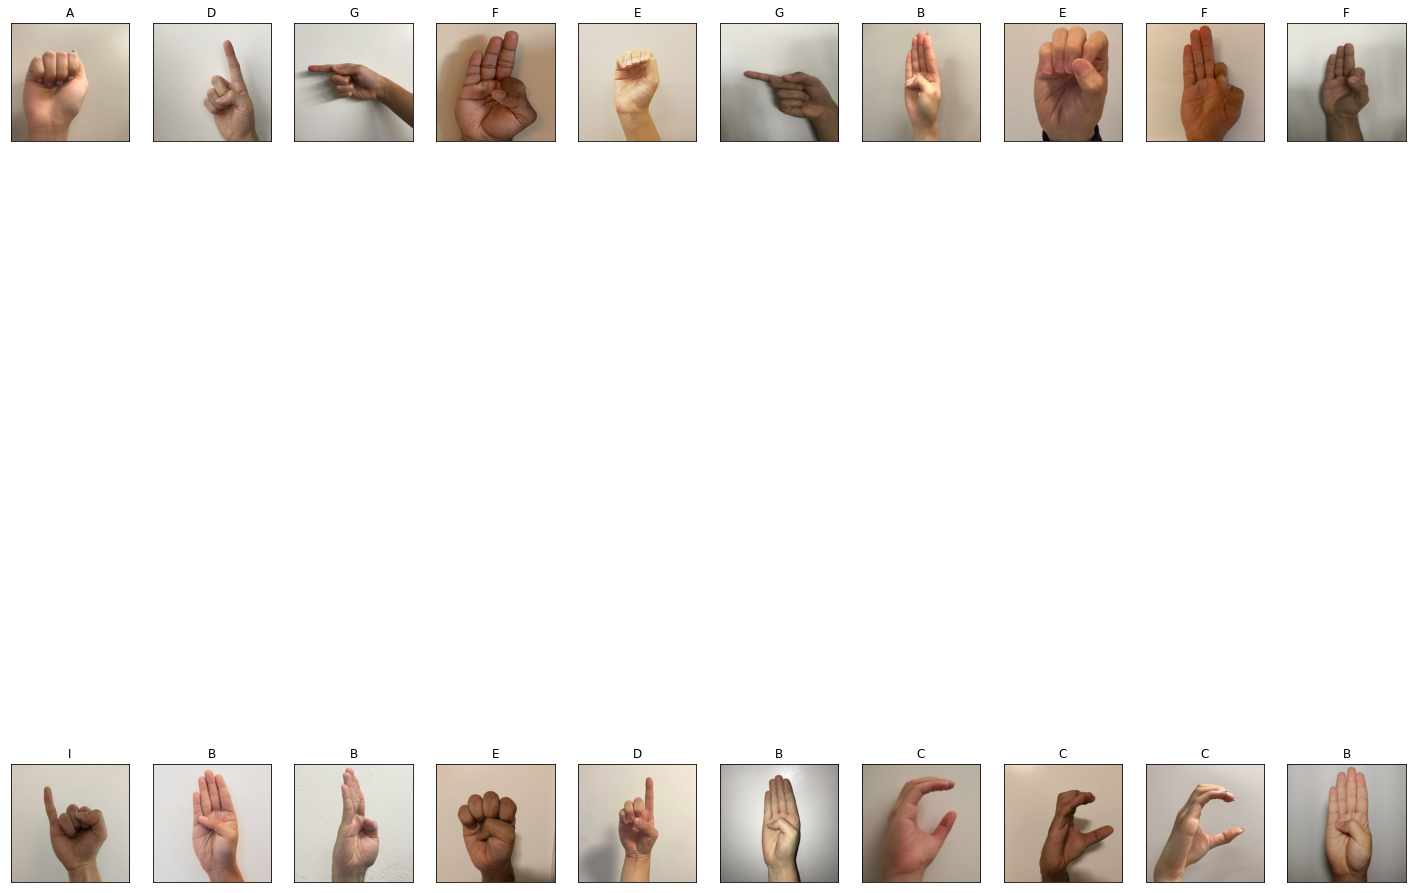

In [ ]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 25))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

### Part 2. Model Building and Sanity Checking
### Part (a) Convolutional Network

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

**Answer**:
for my model, I have 2 convolutional layers + 2 ANN fully connected layers. Below is the sequence of the layers demonstrated by the train sample data (1613 input):
1. 1613 numbers of input with the dimension of 3* 244* 244 (RGB) goes into first convolution layer conv1.
2. The kernel size is 5* 5, output of the conv1 is 5 layers. the shape of the output of the conv1 is 5* 220* 220.
3. output of the conv layer reduces size by 2 using max pool 2*2. The output is 5 * 110 * 110.
4. it is then fed into the second CNN conv2.
5. The kernel size is still 5*5, with padding = 1, the output of conv2 is in the shape of 10 * 106 * 106.
6. It is then fed into a max pool of 2*2, so the final output from the conv2 is in the shape of 10 * 53 * 53.
7. it is then fed into a linear layer with 3000 hidden nodes, followed by Relu activation function.
8. it is then fed into another linear layer followed by Relu activation function, the final output has 9 classes corresponding to 9 letters.

I chose 2 layers of CNN as 3* 244* 224 is a fairly large input, I also built a 3 layers CNN to compare (but later on, I see that with 2 layers CNN, the model starts to overfit already).
I chose 5 *5 kernel size for both layers as the input is fairly large, I also built a model with 3 *3 kernel size to compare later.
I chose maxpooling layer of 2 *2 to reduce the computational cost as well as extract the max value for representation to prevent overfitting.
I chose 2 linear layers with Relu as the activation function as this is a classification model with 9 outputs, and no vanishing gradient issues with Relu,and it is fast.
I chose 3000 as the number of hidden units as the input to the first linear layer is fairly large 10 *53 *53, and the final output has 9 classes.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

#seed?
torch.manual_seed(1) # set the random seed

In [ ]:
# model
class hand_gesture_Classifier(nn.Module):
      def __init__(self):
          super(hand_gesture_Classifier, self).__init__()
          #shape = (1613 or 20*3*224*224)
          self.conv1 = nn.Conv2d(3, 5, 5) #in_channels 3 layers cuz RBG, out_chanels, kernel_size
          #shape=(1613*5*220*220)
          self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
          #shape=(1613*5*110*110)
          self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
          #shape=(1613*10*106*106)
          #shape=(1613*10*53*53)
          self.fc1 = nn.Linear(10*53*53, 3000) #input, number of hidden nodes in the hidden layer
          self.fc2 = nn.Linear(3000, 9) #number of hiddne nodes, 9 class for A to I
          self.name = "model" #name


      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 10*53*53)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
model = hand_gesture_Classifier() #this line refresh the training everytime

In [ ]:
# model4
# kernel size 3*3
class hand_gesture_Classifier4(nn.Module):
      def __init__(self):
          super(hand_gesture_Classifier4, self).__init__()
          #shape = (N*3*224*224)
          self.conv1 = nn.Conv2d(3, 5, 3) #in_channels 3 layers cuz RBG, out_chanels, kernel_size
          #shape=(1613*5*222*222)
          self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
          #shape=(1613*5*111*111)
          self.conv2 = nn.Conv2d(5, 10, 3, padding=1) #in_channels, out_chanels, kernel_size
          #shape=(1613*10*110*110)
          #shape=(1613*10*55*55)
          self.fc1 = nn.Linear(10*55*55, 3000) #input, number of hidden nodes in the hidden layer
          self.fc2 = nn.Linear(3000, 9) #number of hiddne nodes, 9 class for A to I


      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 10*55*55)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
model4 = hand_gesture_Classifier4()

In [ ]:
# 3 layers CNN
# not end up training later as 2 layers CNN model already overfitting
class hand_gesture_Classifier1(nn.Module):
      def __init__(self):
          super(hand_gesture_Classifier1, self).__init__()
          #shape = (1613 or 20*3*224*224)
          self.conv1 = nn.Conv2d(3, 5, 5) #in_channels 3 layers cuz RBG, out_chanels, kernel_size
          #shape=(1613*5*220*220)
          self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
          #shape=(1613*5*110*110)
          self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
          #shape=(1613*10*106*106)
          #shape=(1613*10*53*53)
          self.conv3 = nn.Conv2d(10, 20, 5, padding = 1) #in_channels, out_chanels, kernel_size
          #shape = (1613*20*50*50)
          #shape = (1613*20*25*25)
          self.fc1 = nn.Linear(20*25*25, 3000) #input, number of hidden nodes in the hidden layer
          self.fc2 = nn.Linear(3000, 9) #number of hiddne nodes, 9 class for A to I



      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = self.pool(F.relu(self.conv3(x)))
          x = x.view(-1, 20*25*25)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

### Part (b) Training Code

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

**Answer:**
My choice of loss function and optimizer is cross entropy loss and stochastic gradient descent. Cross entropy loss function is commonly used for multiclass classification. The closer the loss funciton to 0 to better. Stochastic gradient descent is better than gradient descent, it is usually faster for larger dataset, the gradients are not computed according to the entire data, but only a portion of it.

In [ ]:
# check batch size
def get_accuracy(model, train=False):
    if train:
        data = train_data
    else:
        data = val_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=256):

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, data, learning_rate = 0.01, batch_size=256, num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

### Part (c) “Overfit” to a Small Dataset

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

**Answer**:
I used the small dataset with 27 images, so the batch size is 27 with learning rate of 0.001 and 100 epoch, and the training accuracy is 100%. Therefore, the model was able to overfit. I used the first model (name "model") i have in section a (the model with 2 CNN and kernel size of 5*5, and 2 linear layer with Relu).

In [ ]:
# define training, and validation data directories
small_data_dir = '/content/drive/MyDrive/Colab Notebooks/MIE1517_Deep_learning/Lab_assignment/Lab_3a_trainonly'
small_train_dir = os.path.join(small_data_dir, 'train/')
#small_val_dir = os.path.join(small_data_dir, 'val/')
#test_dir = os.path.join(data_dir, 'test/')
#classes are folders in each directory with these names
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [ ]:
# load and transform data using ImageFolder

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((224,224))]) #remove random crop

small_train_data = datasets.ImageFolder(small_train_dir, transform=data_transform)
#small_val_data = datasets.ImageFolder(small_val_dir, transform=data_transform)
#test_data = datasets.ImageFolder(test_dir, transform=data_transform)
# print out some data stats
print('Num small training images: ', len(small_train_data))
#print('Num small validation images: ', len(small_val_data))
#print('Num test images: ', len(test_data))

Num small training images:  27


In [ ]:
# define dataloader parameters
batch_size  = 27
num_workers = 0

# prepare data loaders
small_train_loader = torch.utils.data.DataLoader(small_train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
#small_val_loader = torch.utils.data.DataLoader(small_val_data, batch_size=batch_size,
                                          #num_workers=num_workers, shuffle=True)
#test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          #num_workers=num_workers, shuffle=True)

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data = small_train_data
#    else:
 #       data = mnist_val

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=27):
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, data, batch_size=27, learning_rate = 0.01, num_epochs=1):
  #  train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(small_train_loader):
             #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy
 #           val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
 #   plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
 #   print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


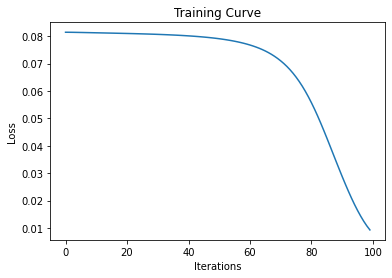

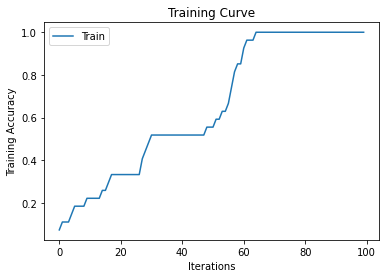

Final Training Accuracy: 1.0


In [ ]:
model = hand_gesture_Classifier()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#train(model, small_train_data, num_epochs=100)
train(model, small_train_data, batch_size=27, learning_rate = 0.001, num_epochs=100)

### Part 3. Hyperparameter Search


### Part (a)

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

In [ ]:
# tune number of epochs

In [ ]:
# tune learning rate

In [ ]:
# tune batch size

In [ ]:
# tune kernel size

### Part (b)

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

CUDA is available!  Training on GPU ...


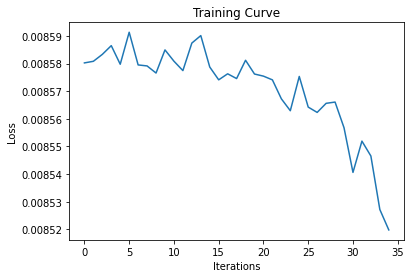

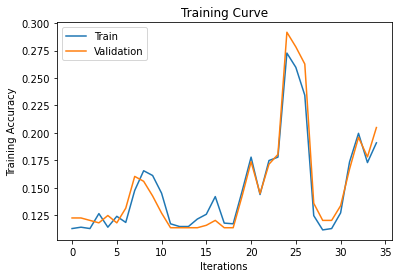

Final Training Accuracy: 0.19094854308741477
Final Validation Accuracy: 0.20489977728285078


In [ ]:
### number of epochs = 5
model = hand_gesture_Classifier()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, learning_rate = 0.01, batch_size=256, num_epochs=5)

CUDA is available!  Training on GPU ...


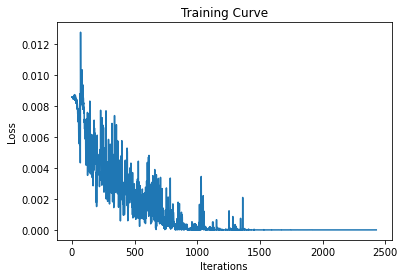

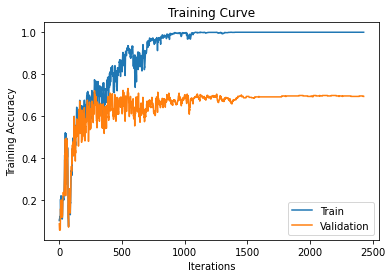

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.6948775055679287


In [ ]:
# increase the number of epochs to 30, batch size = 256, learing rate = 0.01
model = hand_gesture_Classifier()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, num_epochs=30)

 The model over fit now, the training accuracy is 100%. Need to decrease the number of epoch to prevent overfitting. Next try epoch of 10.

CUDA is available!  Training on GPU ...


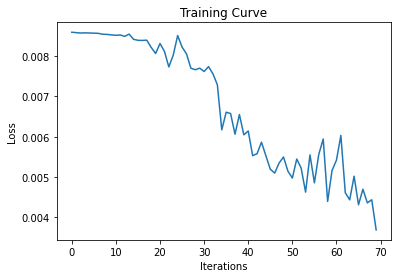

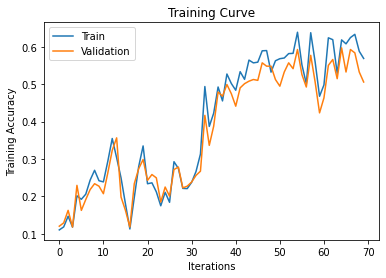

Final Training Accuracy: 0.5685058896466212
Final Validation Accuracy: 0.5055679287305123


In [ ]:
# tune number of epochs
model = hand_gesture_Classifier()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, learning_rate = 0.01, batch_size=256, num_epochs=10)

At epoch at 10, the accuracy decreased comparing to when epoch = 30. 30 epochs has the highest validation and training accuracy comparing to epoch = 5 and 10.


CUDA is available!  Training on GPU ...


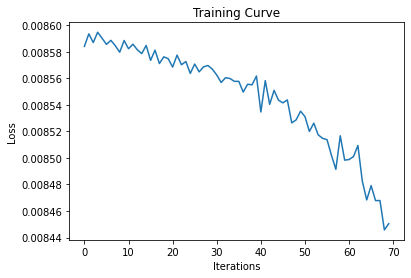

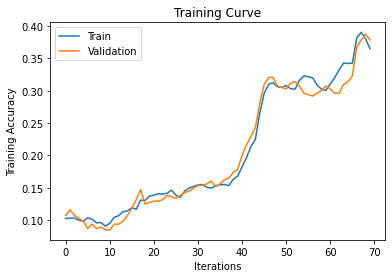

Final Training Accuracy: 0.3651580905145691
Final Validation Accuracy: 0.37861915367483295


In [ ]:
# tune learning rate

model = hand_gesture_Classifier()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, learning_rate = 0.001, batch_size=256, num_epochs=10)

at the learning rate of 0.001, both the training rate and validation accuracy did not reach as high as the previous model with 10 epochs (which has a training accuracy of 57% and validation accuracy of 51%). For this model the accuracy will likely get better if I train with more epochs.

In [ ]:
##save best model
def train(model, data, learning_rate = 0.01, batch_size=256, num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1
         # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, num_epochs)
        torch.save(model.state_dict(), model_path)

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
def get_model_name(name, batch_size, learning_rate, num_epochs):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   num_epochs)
    return path

In [ ]:
# check batch size
def get_accuracy(model, train=False):
    if train:
        data = train_data
    else:
        data = val_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=128):

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

CUDA is available!  Training on GPU ...


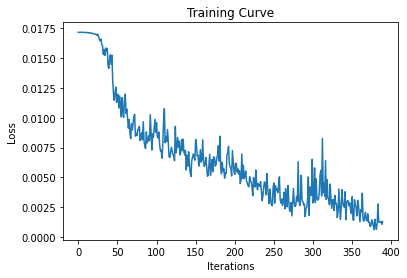

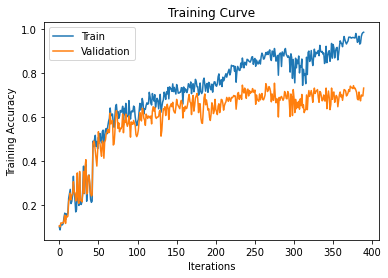

Final Training Accuracy: 0.986360818350899
Final Validation Accuracy: 0.732739420935412


In [ ]:
# tune batch size, save model in model path
model = hand_gesture_Classifier()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, learning_rate = 0.01, batch_size=128, num_epochs=30)

With batch size of 128, learning rate of 0.01 and 30 epochs, the model with 2 layer CNN, training accuracy reached 98.6%, the validation accuracy increased too, it is at 73.3%.

CUDA is available!  Training on GPU ...


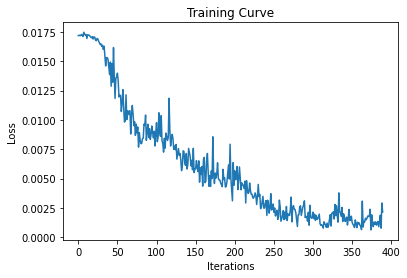

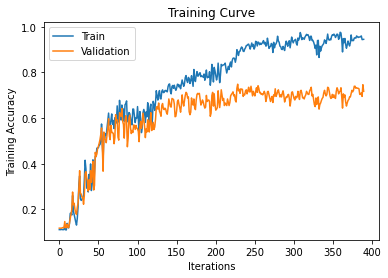

Final Training Accuracy: 0.9448233106013639
Final Validation Accuracy: 0.7171492204899778


In [ ]:
# tune the kernel size 3*3
model4 = hand_gesture_Classifier4()

use_cuda = True


if use_cuda and torch.cuda.is_available():
  model4.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model4, train_data, learning_rate = 0.01, batch_size=128, num_epochs=30)

Comparing this result to the 5 * 5 kernel cnn model, since both have the same train function input (batch size of 128, learning rate of 0.01 and 30 epochs), the 2 layer CNN with 5 * 5 kerneal has a slightly higher training accuracy and a higher validation accuracy.  

italicised text### Part (c)
Choose the best model out of all the ones that you have trained. Justify your choice.

Answer: below I summarized the training and validation accuracy of each model and their parameters:
1. Tune epoch

*   model, learning rate = 0.01, batch size = 256, epoch = 5, train accuracy = 20%, validation accuracy = 20%.
*   model, learning rate = 0.01, batch size = 256, epoch = 30, train accuracy = 100%, validation accuracy = 70%.
*   model, learning rate = 0.01, batch size = 256, epoch = 10, train accuracy = 57%, validation accuracy = 51%.

2. tune learning rate

*   model, learning rate = 0.001, batch size = 256, epoch = 10, train accuracy = 36.5%, validation accuracy = 37.9%.
3. tune batch size

*   model, learning rate = 0.01, batch size = 128, epoch = 30, train accuracy = 98%, validation accuracy = 73.3%.
4. tune kernel size

*   (all kernel size for previous models are 5*5), this one (model4) is 3*3, learning rate = 0.01, batch size = 128, epoch = 30, train accuracy = 94.5%, validation accuracy = 71.7%

Therefore, the best model so far is:
model(kernel size 5*5 with 2 layers CNN), learning rate = 0.01, batch size = 128, epoch = 30, train accuracy = 98%, validation accuracy = 73.3%. The model path to the best model at epoch 30 is also saved.

As copy and paste below:







In [ ]:
# copy best model below for clarity
class hand_gesture_Classifier(nn.Module):
      def __init__(self):
          super(hand_gesture_Classifier, self).__init__()
          #shape = (1613 or 20*3*224*224)
          self.conv1 = nn.Conv2d(3, 5, 5) #in_channels 3 layers cuz RBG, out_chanels, kernel_size
          #shape=(1613*5*220*220)
          self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
          #shape=(1613*5*110*110)
          self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
          #shape=(1613*10*106*106)
          #shape=(1613*10*53*53)
          self.fc1 = nn.Linear(10*53*53, 3000) #input, number of hidden nodes in the hidden layer
          self.fc2 = nn.Linear(3000, 9) #number of hiddne nodes, 9 class for A to I


      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 10*53*53)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
# copy best parameters below for clarity
model = hand_gesture_Classifier()
train(model, train_data, learning_rate = 0.01, batch_size=128, num_epochs=30)

### Part (d)
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
model = hand_gesture_Classifier()
model_path = get_model_name("model", batch_size=128, learning_rate=0.01, num_epochs=30)
state = torch.load(model_path)
model.load_state_dict(state)

<All keys matched successfully>

In [ ]:
# check batch size
def get_accuracy(model, train=False):
    if train:
        data = train_data
    else:
        data = test_data

    correct = 0
    total = 0
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=128):

        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
use_cuda = True


if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
get_accuracy(model,train=False)

0.7940379403794038

**Answer**: the test accuracy is 79.4%.

### Part 4. Transfer Learning
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a)
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexNet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# define dataloader parameters
batch_size  = 128 ##remember to check this
num_workers = 1

# prepare data loaders
feature_train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
feature_val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)
feature_test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

In [ ]:
# extract alexnet features from training data
torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter = iter(train_loader)
train_images, labels = dataiter.next()

# confirm output from AlexNet feature extraction

train_features = alexNet.features(train_images)
train_features.shape #batch size is 128

torch.Size([128, 256, 6, 6])

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...

# extract alexnet features from val data
torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter = iter(val_loader)
val_images, labels = dataiter.next()

# confirm output from AlexNet feature extraction

val_features = alexNet.features(val_images)
val_features.shape #batch size is 128

torch.Size([128, 256, 6, 6])

In [ ]:
# extract alexnet features from test data
torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter = iter(test_loader)
test_images, labels = dataiter.next()

# confirm output from AlexNet feature extraction

test_features = alexNet.features(test_images)
test_features.shape #batch size is 128

torch.Size([128, 256, 6, 6])

In [ ]:
# use before this line

In [ ]:
#f_train_list = []
#f_val_list = []
#f_test_list = []

In [ ]:
# for images, labels in iter(feature_train_loader):
#   feature = alexNet.features(images)
#   f_train_list.append(torch.from_numpy(feature.detach().numpy()))

# for images, labels in iter(feature_val_loader):
#   feature = alexNet.features(images)
#   f_val_list.append(torch.from_numpy(feature.detach().numpy()))

# for images, labels in iter(feature_test_loader):
#   feature = alexNet.features(images)
#   f_test_list.append(torch.from_numpy(feature.detach().numpy()))


In [ ]:
# for images, labels in iter(feature_val_loader):
#   train_features = alexNet.features(images)
#   img_val = torch.from_numpy(train_features.detach().numpy())

In [ ]:
# for images, labels in iter(feature_test_loader):
#   train_features = alexNet.features(images)
#   img_test = torch.from_numpy(train_features.detach().numpy())

In [ ]:
# print(img_train.shape)
# print(img_val.shape)
# print(img_test.shape)

torch.Size([1, 256, 6, 6])
torch.Size([1, 256, 6, 6])
torch.Size([1, 256, 6, 6])


In [ ]:
#train_images = torch.from_numpy(train_images.detach().numpy())

In [ ]:
labels.shape

torch.Size([128])

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

### Part (b)
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
#output = model(features)
#prob = F.softmax(output)

**Answer:**
i chose 2 layers of fully connected with Relu as activation function, since the Alexnet features already has very complicated CNN layers, more CNN layers might result in overfitting. I choose Relu as activation function for the same reason as before(it is a multiclass classification problem and Relu is fast, suitable for large dataset, with no vanishing gradients). I have 20 numbers of nodes in the hidden layer, the output has 9 nodes for the corresponding 9 letters.

In [ ]:
#Artifical Neural Network Architecture
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.fc1 = nn.Linear(256 * 6 * 6, 20)
        self.fc2 = nn.Linear(20, 9)
        self.name = "model_ann" #name

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
modelANN=ANNClassifier()

### Part (c)
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
#tensor = torch.from_numpy(tensor.detach().numpy())

In [ ]:
#save path and best model
def train(model, data, learning_rate = 0.01, batch_size=128, num_epochs=10):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    #train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                       #    num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        #for imgs in train_features:
        for imgs, labels in iter(train_loader):

            imgs = features = alexNet.features(imgs) #SLOW
            #print(n)
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################


            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, num_epochs)
        torch.save(model.state_dict(), model_path)

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = train_loader
    else:
        data_loader = val_loader

    correct = 0
    total = 0
    #for imgs in train_features:
    for imgs, labels in data_loader:
        imgs = alexNet.features(imgs) #SLOW
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
classifier_output = ANNClassifier()

In [ ]:
next(classifier_output.parameters()).is_cuda

False

CUDA is available!  Training on GPU ...


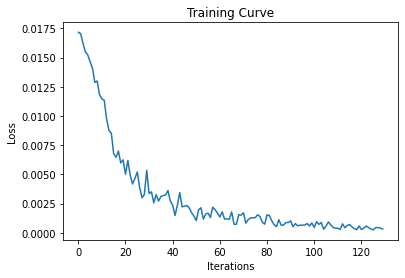

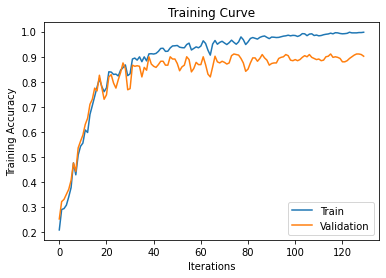

Final Training Accuracy: 0.9975201487910725
Final Validation Accuracy: 0.9020044543429844


In [ ]:
use_cuda = True

classifier_output = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  classifier_output.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(classifier_output,train_features, learning_rate = 0.01, batch_size=128, num_epochs=10)

**Answer**: the plot above is my best model with feature extraction.

CUDA is not available.  Training on CPU ...
0
1
2
3
4
5
6
7
8
9
10
11
12


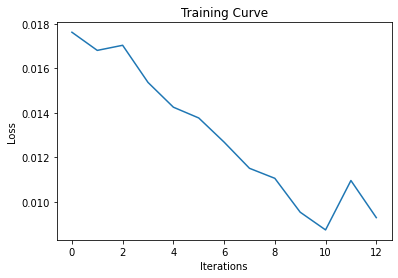

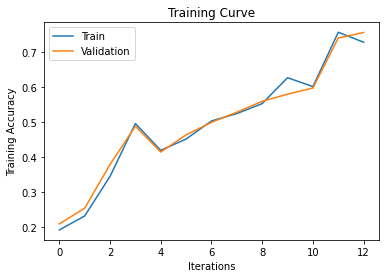

Final Training Accuracy: 0.7272163670179789
Final Validation Accuracy: 0.755011135857461


In [ ]:
# number of epoch = 1
use_cuda = False

classifier_output = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(classifier_output,train_features, learning_rate = 0.01, batch_size=128, num_epochs=1)

CUDA is not available.  Training on CPU ...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129


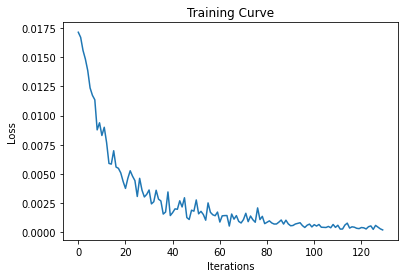

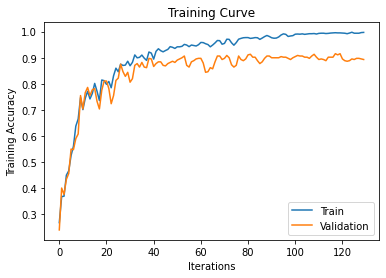

Final Training Accuracy: 0.9969001859888407
Final Validation Accuracy: 0.8930957683741648


In [ ]:
# increase the epoch = 10
use_cuda = False

classifier_output = ANNClassifier()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(classifier_output,train_features, learning_rate = 0.01, batch_size=128, num_epochs=10)

### Part (d)
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

Answer:
The test accuracy from best model in part 4 is 79.4%, and the test accuracy of best alexnet + ANN model is 91.1%. The transfer learning model has a much higher accuracy comparing to my simple 2 layer CNN +ANN model from part 3. This is expected as alenet is the leading architecture in image classification, it has 5 convolutional layers (my best model only has 2). Using alexnet feature transfer significantly increases the test accuracy of the hand gesture classification.

In [ ]:
classifier_output.parameters()

<generator object Module.parameters at 0x7f6d72865dd0>

In [ ]:
classifier_output = ANNClassifier()
model_path = get_model_name("model_ann", batch_size=128, learning_rate=0.01, num_epochs=10)
state = torch.load(model_path)
classifier_output.load_state_dict(state)

<All keys matched successfully>

In [ ]:
# check batch size
def get_accuracy(model, train=False):
    if train:
        data = train_data
    else:
        data = test_data

    correct = 0
    total = 0

    for imgs, labels in iter(feature_test_loader):

        imgs = features = alexNet.features(imgs) #SLOW
            #print(n)
            #############################################
            #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
           imgs = imgs.cuda()
           labels = labels.cuda()
            #############################################


        out = model(imgs)


          #select index with maximum prediction score
        pred = out.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total



In [ ]:
use_cuda = True


if use_cuda and torch.cuda.is_available():
  classifier_output.cuda()
  print('CUDA is available!  Testing on GPU ...')
else:
  print('CUDA is not available.  Testing on CPU ...')
get_accuracy(classifier_output, train=False)

CUDA is available!  Testing on GPU ...


0.9105691056910569

### Part 5. Testing on New Data
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures.



### Part (a)
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [ ]:
# define testing data directories
small_data_dir = '/content/drive/MyDrive/Colab Notebooks/MIE1517_Deep_learning/Lab_assignment/Lab_3a_trainonly'
small_test_dir = os.path.join(small_data_dir, 'train/')
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [ ]:
# load and transform data using ImageFolder

# resize all images to 224 x 224
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Resize((224,224))])

small_test_data = datasets.ImageFolder(small_test_dir, transform=data_transform)
# print out some data stats
print('Num small training images: ', len(small_test_data))

Num small training images:  27


In [ ]:
# define dataloader parameters
batch_size  = 27
num_workers = 0

# prepare data loaders
small_test_loader = torch.utils.data.DataLoader(small_test_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)

### Part (b)
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

**Answer:**
I used my best transfer learning model from part 4 which has a training accuracy of 99.8% and a validation accuracy of 90.2%. See below for the testing process. The test accuracy is 92.6% which is slightly higher than the validation accuracy. This might be due to that the training data has many different people's hands and my small dataset (27) only has my own hand. So the training dataset has more complex than the test dataset. The model is trained to classify much more complicated data than the test data.  

The overall performance of the alexnet feature extraction + ANN model out performed the best model from part 3. Comparing the alexnet feature extraction with the others:


*   From part 3, the best model test accuracy on large dataset is 79.4%
*   With feature transfer, the best model test accuracy on large data is 91.1%.
*   With feature transfer, the best model test accuracy on my own dataset is 92.5%.

Overall, with feature transfer, test accuracy is significantly higher. However, with my simple 2 layer CNN model, the test accuracy is ok too.







In [ ]:
import torchvision.models
alexNet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# extract alexnet features from training data
torch.manual_seed(1) # set the random seed


# obtain one batch of training images
dataiter_test = iter(small_test_loader)
small_test_images, labels = dataiter_test.next()

# confirm output from AlexNet feature extraction

small_test_features = alexNet.features(small_test_images)
small_test_features.shape #batch size is 27

torch.Size([27, 256, 6, 6])

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = small_test_loader
    else:
        data_loader =small_test_loader

    correct = 0
    total = 0
    #for imgs in train_features:
    for imgs, labels in data_loader:
        imgs = alexNet.features(imgs) #SLOW
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
# test for small_test_loader
use_cuda = True


if use_cuda and torch.cuda.is_available():
  classifier_output.cuda()
  print('CUDA is available!  Testing on GPU ...')
else:
  print('CUDA is not available.  Testing on CPU ...')
get_accuracy(classifier_output, train=False)

CUDA is available!  Testing on GPU ...


0.9259259259259259

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html /content/LAB_2_Hand_Gesture_Recognition_HY.ipynb

[NbConvertApp] Converting notebook /content/LAB_2_Hand_Gesture_Recognition_HY.ipynb to html
[NbConvertApp] Writing 1476718 bytes to /content/LAB_2_Hand_Gesture_Recognition_HY.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus